In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [3]:
data=pd.read_csv('headache.csv')

In [4]:
data.head()

,age,duration,severity,location,type,photophobia and phonophobia,vomiting,motion sensitivity,head injury,alcohol,symptoms1,attacks,result
0,48,days,extremly severe,0,0,0,0,no,0,1,0,0,hangover headache
1,47,days,moderate,0,0,1,1,no,0,1,0,1,hangover headache
2,36,days,extremly severe,0,0,1,0,no,0,1,0,0,hangover headache
3,26,hours,moderate,unilateral,pulsating,0,0,yes,0,0,0,2,migraine
4,32,hours,severe,bilateral,throbbing,1,0,no,0,0,0,1,migraine


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          273 non-null    int64 
 1   duration                     273 non-null    object
 2   severity                     273 non-null    object
 3   location                     273 non-null    object
 4   type                         273 non-null    object
 5   photophobia and phonophobia  273 non-null    int64 
 6   vomiting                     273 non-null    int64 
 7   motion sensitivity           273 non-null    object
 8   head injury                  273 non-null    int64 
 9   alcohol                      273 non-null    int64 
 10  symptoms1                    273 non-null    object
 11  attacks                      273 non-null    int64 
 12  result                       273 non-null    object
dtypes: int64(6), object(7)
memory usage

In [6]:
data.isnull().values.any()

False

In [41]:
data1=data.replace({'duration':{'0':0,'days':1,'hours':2,'minutes':3},'severity':{'extremly severe':4,'severe':3,'moderate':2,'mild':1,'0':0},'location':{'unilateral':1,'bilateral':2,'0':0},'motion sensitivity':{'yes':1,'no':0,'1':1,'0':0},'type':{'0':0,'pulsating':1,'throbbing':2,'searing':3,'tightening':4,'dulll':5,'pressing':6,'boring':7},'symptoms1':{'0':0,'conjunctival redness':1,'nasal congestion':2,'sweating on face':3,'runny or stuffy nose':4,'pain in face':5,'congestion':6,'fever':7,'memory loss':8,'confusion':9,'vision or hearing problems':10,'unconsciousness':11},'result':{'hangover headache':0,'migraine':1,'tension':2,'cluster':3,'sinus':4,'head-injury':5}})
data1

,age,duration,severity,location,type,photophobia and phonophobia,vomiting,motion sensitivity,head injury,alcohol,symptoms1,attacks,result
0,48,1,4,0,0,0,0,0,0,1,0,0,0
1,47,1,2,0,0,1,1,0,0,1,0,1,0
2,36,1,4,0,0,1,0,0,0,1,0,0,0
3,26,2,2,1,1,0,0,1,0,0,0,2,1
4,32,2,3,2,2,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,3,0,1,0,0,0,0,0,0,1,8,3
269,29,3,3,0,0,0,0,0,0,0,3,6,3
270,35,3,3,1,3,0,1,0,0,0,3,5,3
271,25,3,4,1,0,0,0,0,0,0,3,7,3


In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          273 non-null    int64
 1   duration                     273 non-null    int64
 2   severity                     273 non-null    int64
 3   location                     273 non-null    int64
 4   type                         273 non-null    int64
 5   photophobia and phonophobia  273 non-null    int64
 6   vomiting                     273 non-null    int64
 7   motion sensitivity           273 non-null    int64
 8   head injury                  273 non-null    int64
 9   alcohol                      273 non-null    int64
 10  symptoms1                    273 non-null    int64
 11  attacks                      273 non-null    int64
 12  result                       273 non-null    int64
dtypes: int64(13)
memory usage: 27.9 KB


In [51]:
import matplotlib.pyplot as plt
plt.scatter("age",result)
plt.show()

NameError: name 'result' is not defined

In [44]:
x=data1.drop('result',axis=1)
y=data1['result']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
print('X training data size:', x_train.shape)
print('y training data size:', y_train.shape)
print('X testing data size:', x_test.shape)
print('y testing data size:', y_test.shape) 
print("Data in training set:", (len(x_train)/len(data1.index)) * 100)
print("Data in test set:", (len(x_test)/len(data1.index)) * 100)

X training data size: (163, 12)
y training data size: (163,)
X testing data size: (110, 12)
y testing data size: (110,)
Data in training set: 59.70695970695971
Data in test set: 40.29304029304029


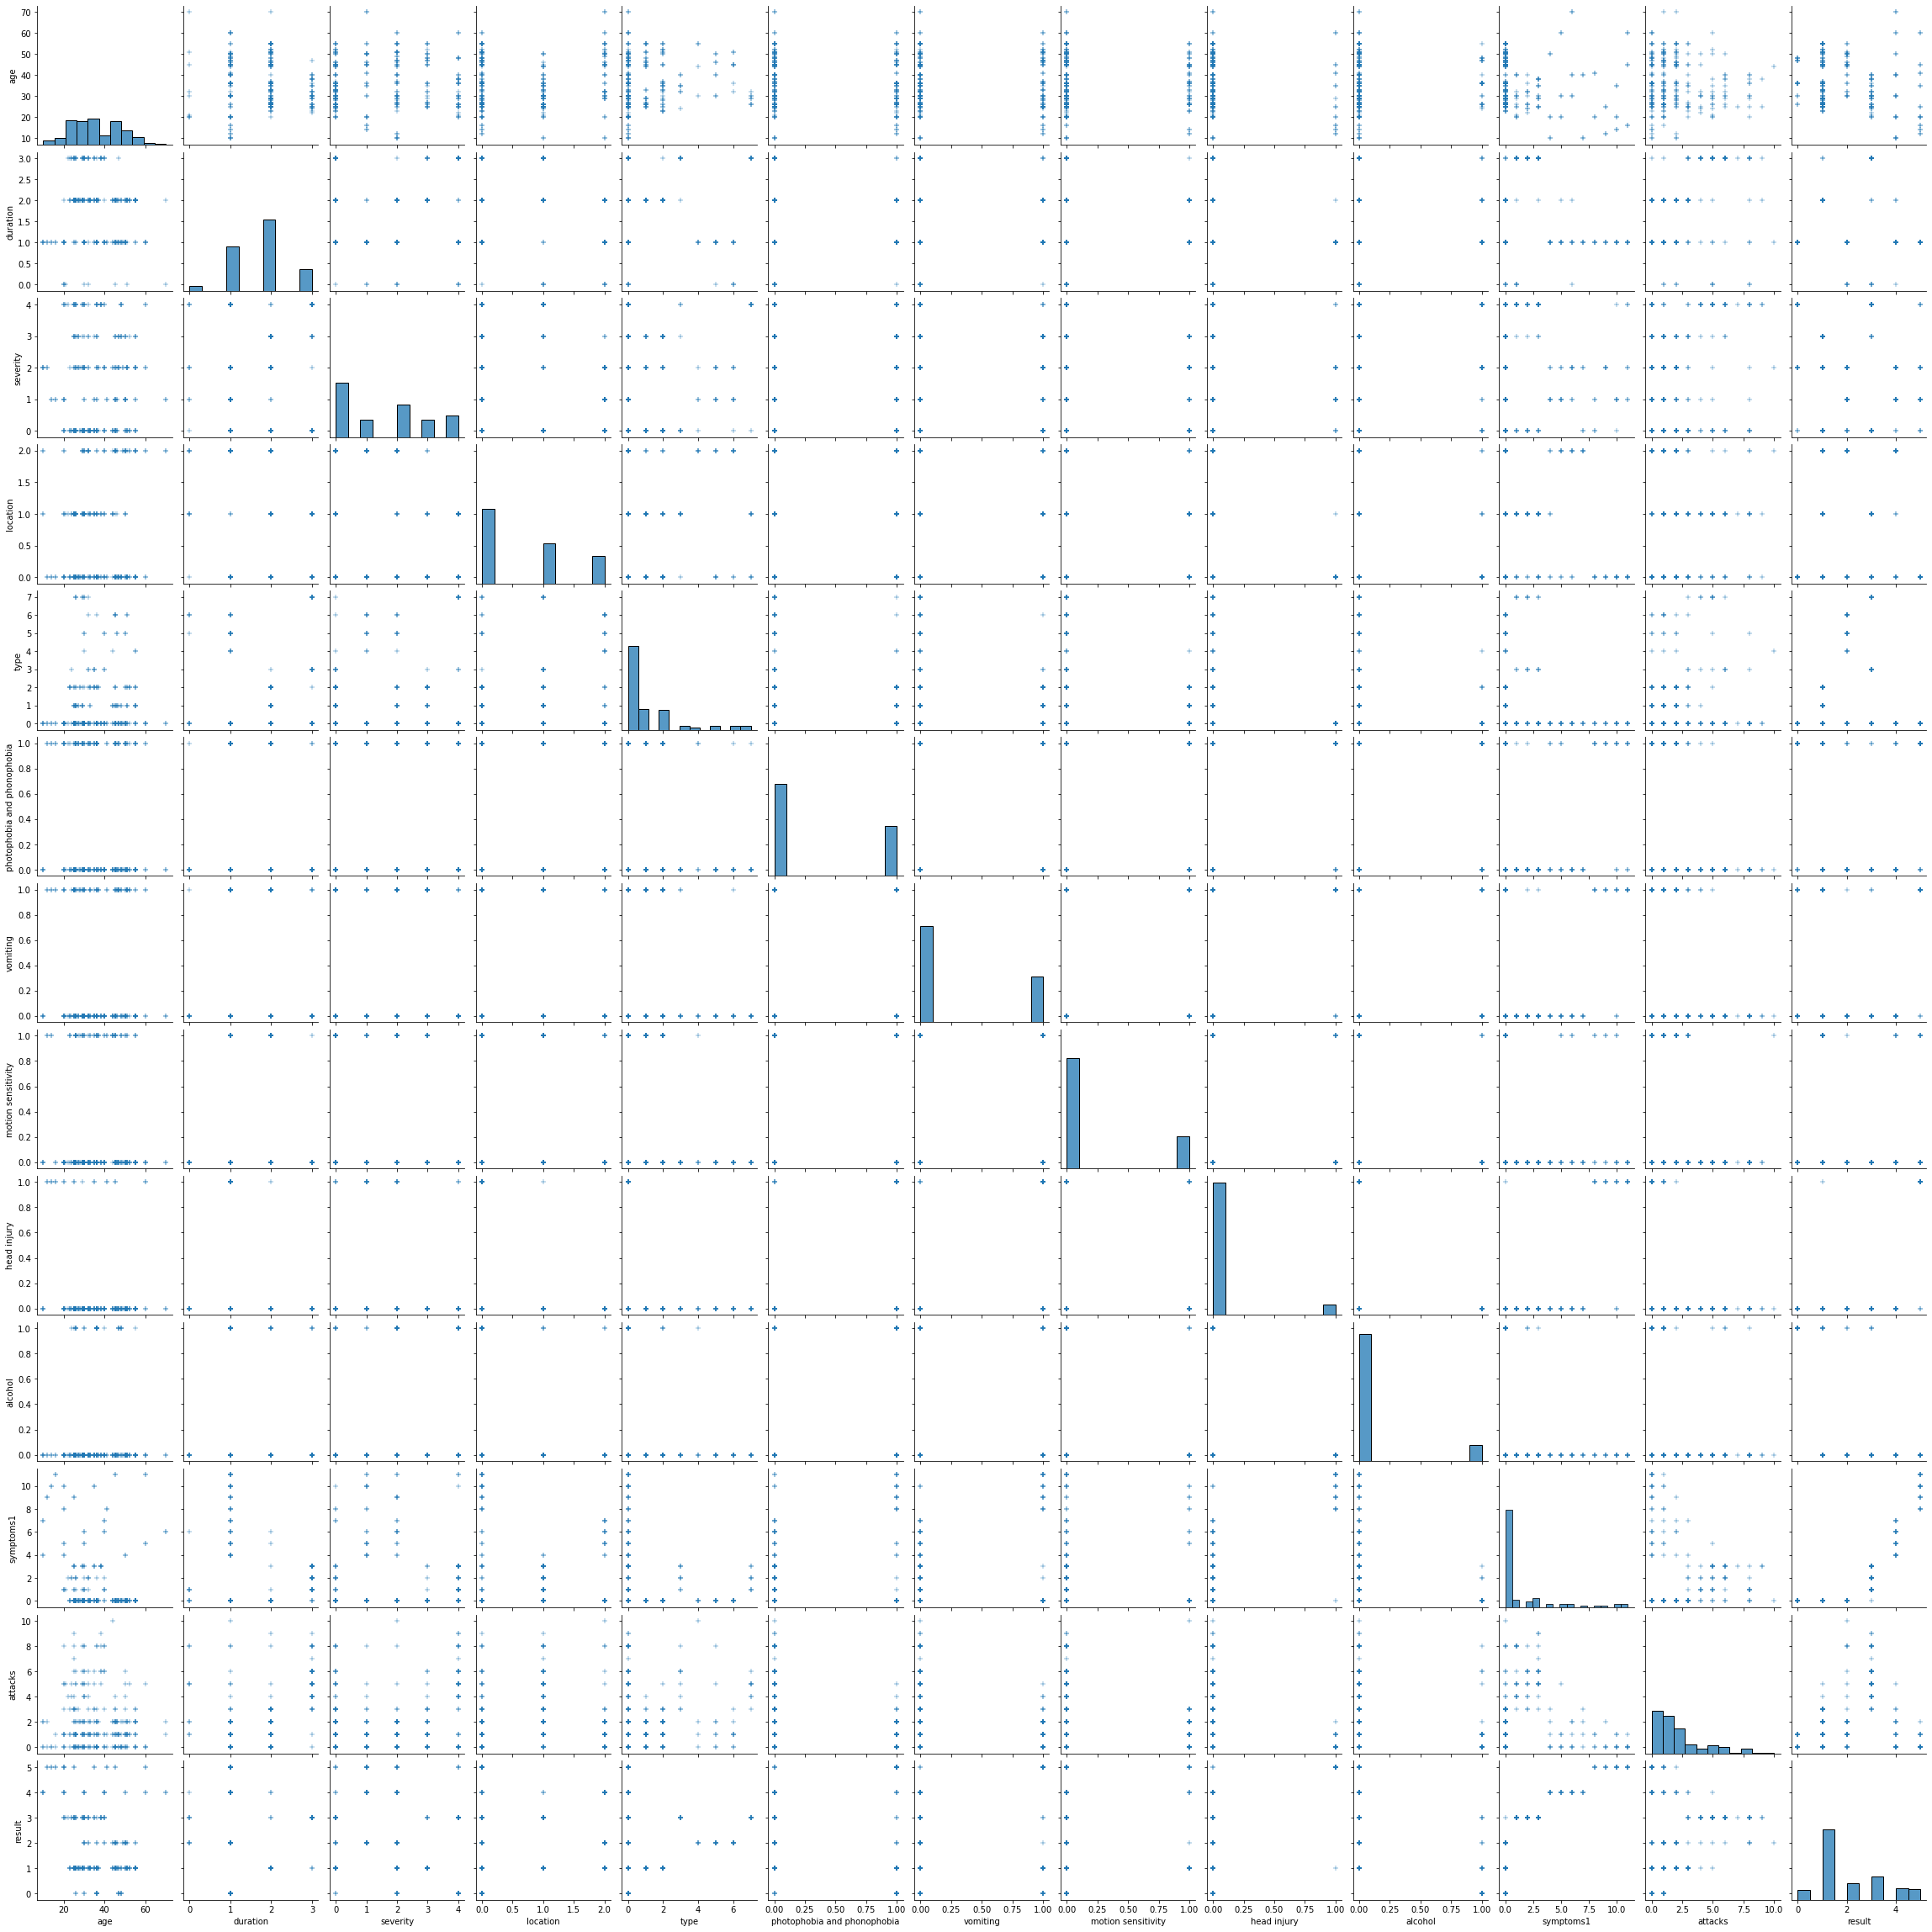

In [26]:
sns.pairplot(data1, markers='+')
plt.show()

In [28]:
gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)
gnb_pred = gnb_model.predict(x_test)
gnb_pred1 = gnb_model.predict(x_train)

In [29]:
cm=np.array(confusion_matrix(y_test, gnb_pred, labels=[1, 0]))
cm

array([[50,  0],
       [ 0,  9]], dtype=int64)

In [32]:
metrics.accuracy_score(y_test,gnb_pred)

0.9818181818181818

In [33]:
metrics.accuracy_score(y_train,gnb_pred1)

0.9754601226993865

In [34]:
print(gnb_pred)

[3 1 4 2 1 1 1 3 4 1 4 0 1 1 1 1 1 1 2 3 1 2 4 5 1 5 0 1 3 1 1 3 2 5 1 2 1
 1 3 3 3 1 4 1 1 3 1 5 1 2 5 1 1 2 5 1 1 3 1 1 3 2 4 1 1 3 1 1 5 0 3 2 4 3
 1 1 4 1 1 0 5 0 1 4 0 1 1 4 5 0 2 2 1 0 1 2 2 3 4 1 1 3 1 1 1 3 1 1 4 0]
